**Step 1. Create your own dataset featuring 3 custom categories of at least 100 images each**

In [131]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow import keras

In [132]:
p = "dataset/"
classes = ['Fuecoco', 'Quaxly', 'Sprigatito']

In [133]:
imgs = {}
for c in classes:
    pa = p + c
    print(pa)
    imgs[c] = []
    for i in range(1, 101):
        file_name = f"{pa}/{c}_{i}.png"
        img = Image.open(file_name)
        img = img.convert("RGB")
        img = img.resize((299, 299))
        img = np.array(img)
        imgs[c].append(img)
 

dataset/Fuecoco


C:\Users\MidAutumnFestival\AppData\Roaming\Python\Python310\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


dataset/Quaxly
dataset/Sprigatito


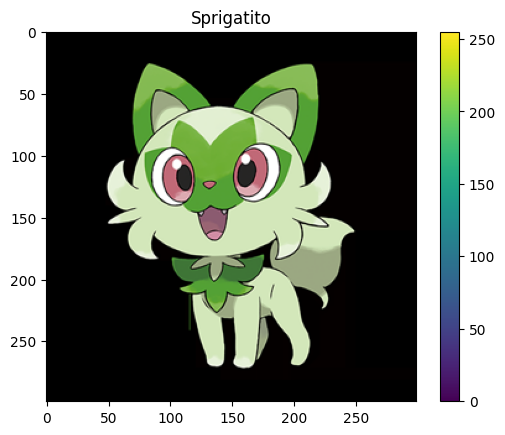

In [134]:
plt.figure()
plt.imshow(imgs['Sprigatito'][0])
plt.colorbar()
plt.title('Sprigatito')
plt.grid(False)
plt.show()

**Step 2. Split this data between 80% training and 20% test**

In [135]:
X = np.concatenate((imgs['Fuecoco'], imgs['Quaxly'], imgs['Sprigatito']))
y = np.concatenate(([0] * 100, [1] * 100, [2] * 100))

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=50)

**Step 3. Preprocess the data as you see fit**

In [137]:
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

**Step 4. Create a Convolutional Neural Network based model to learn on your training set**

In [138]:
model = keras.Sequential([
  keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=X_train[0].shape),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(3)
])

In [139]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [140]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_294 (Conv2D)         (None, 299, 299, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_295 (Conv2D)         (None, 149, 149, 32)      4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_296 (Conv2D)         (None, 74, 74, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 37, 37, 64)     

In [141]:
epochs=10
history = model.fit(
  X_train, y_train,
  epochs=epochs,
  validation_data=(X_val, y_val),
)

Epoch 1/10
6/6 [==============================] - 13s 2s/step - loss: 6.2680 - accuracy: 0.3833 - val_loss: 2.1949 - val_accuracy: 0.4167
Epoch 2/10
6/6 [==============================] - 14s 2s/step - loss: 0.8969 - accuracy: 0.7056 - val_loss: 0.6638 - val_accuracy: 0.6833
Epoch 3/10
6/6 [==============================] - 13s 2s/step - loss: 0.4973 - accuracy: 0.7889 - val_loss: 0.4578 - val_accuracy: 0.8000
Epoch 4/10
6/6 [==============================] - 13s 2s/step - loss: 0.2216 - accuracy: 0.9389 - val_loss: 0.1238 - val_accuracy: 0.9833
Epoch 5/10
6/6 [==============================] - 13s 2s/step - loss: 0.0891 - accuracy: 0.9944 - val_loss: 0.0921 - val_accuracy: 0.9667
Epoch 6/10
6/6 [==============================] - 13s 2s/step - loss: 0.0392 - accuracy: 0.9944 - val_loss: 0.1518 - val_accuracy: 0.9167
Epoch 7/10
6/6 [==============================] - 13s 2s/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.0777 - val_accuracy: 0.9667
Epoch 8/10
6/6 [==================

In [142]:
def train_val_acc_loss(hist, epoch):
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']

    loss = hist.history['loss']
    val_loss = hist.history['val_loss']

    epochs_range = range(epoch)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

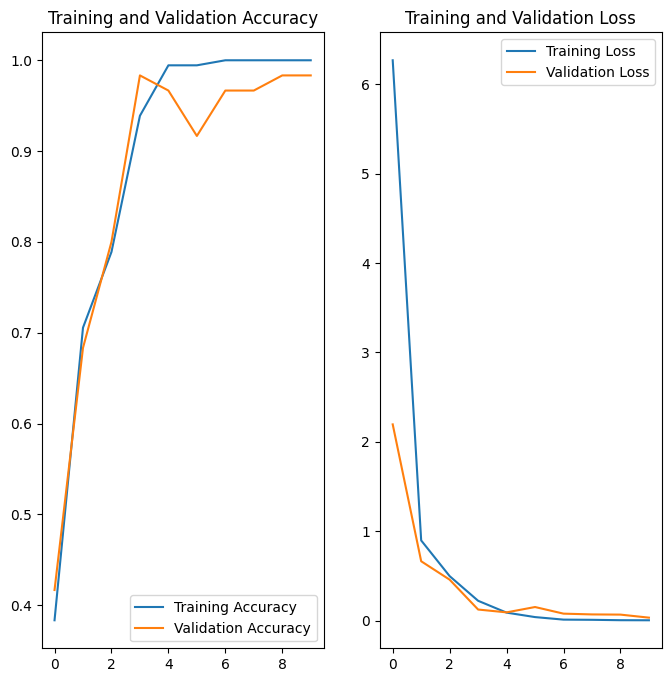

In [143]:
train_val_acc_loss(history, epochs)

**Step 5. Make predictions on the test data and compare them to the expected categories**

In [144]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label: color = 'blue'
  else: color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label], 100*np.max(predictions_array), classes[true_label]), color = color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(3), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [145]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

2/2 - 1s - loss: 0.1442 - accuracy: 0.9500 - 746ms/epoch - 373ms/step

Test accuracy: 0.949999988079071


In [146]:
y_pred = model.predict(X_test)
y_pred = [ np.argmax(p) for p in y_pred ]
comparison = pd.DataFrame({'Actual': y_test, 'Label': y_pred})

print(comparison)

2/2 [==============================] - 1s 344ms/step
    Actual  Label
0        2      2
1        0      0
2        1      1
3        2      2
4        1      1
5        1      1
6        0      0
7        2      2
8        0      0
9        0      0
10       0      0
11       2      2
12       2      2
13       1      1
14       2      2
15       1      1
16       0      0
17       2      2
18       2      2
19       0      0
20       0      0
21       0      0
22       0      0
23       0      0
24       2      2
25       1      1
26       0      0
27       2      2
28       2      2
29       0      0
30       1      1
31       0      0
32       0      1
33       0      0
34       0      0
35       0      0
36       1      1
37       2      2
38       2      2
39       2      2
40       1      1
41       0      0
42       2      2
43       0      0
44       0      0
45       2      1
46       0      0
47       2      2
48       1      1
49       1      1
50       1      1
51       0 

In [147]:
probability_model = keras.Sequential([model, keras.layers.Softmax()])
predictions = probability_model.predict(X_test)

2/2 [==============================] - 1s 345ms/step


In [148]:
from math import ceil

def show_actual_and_pred(actual, predictions, num=30):
    plt.figure(figsize = (30,30))
    for i in range(num):
        plt.subplot(10, ceil(num / 5), i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_test[i], cmap = plt.cm.binary)
        predicted_label = np.argmax(predictions[i])
        if predicted_label == actual[i]:
            color = 'blue'
        else:
            color = 'red'

        plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label], 100 * np.max(predictions[i]), classes[actual[i]]), color = color)
    plt.show()

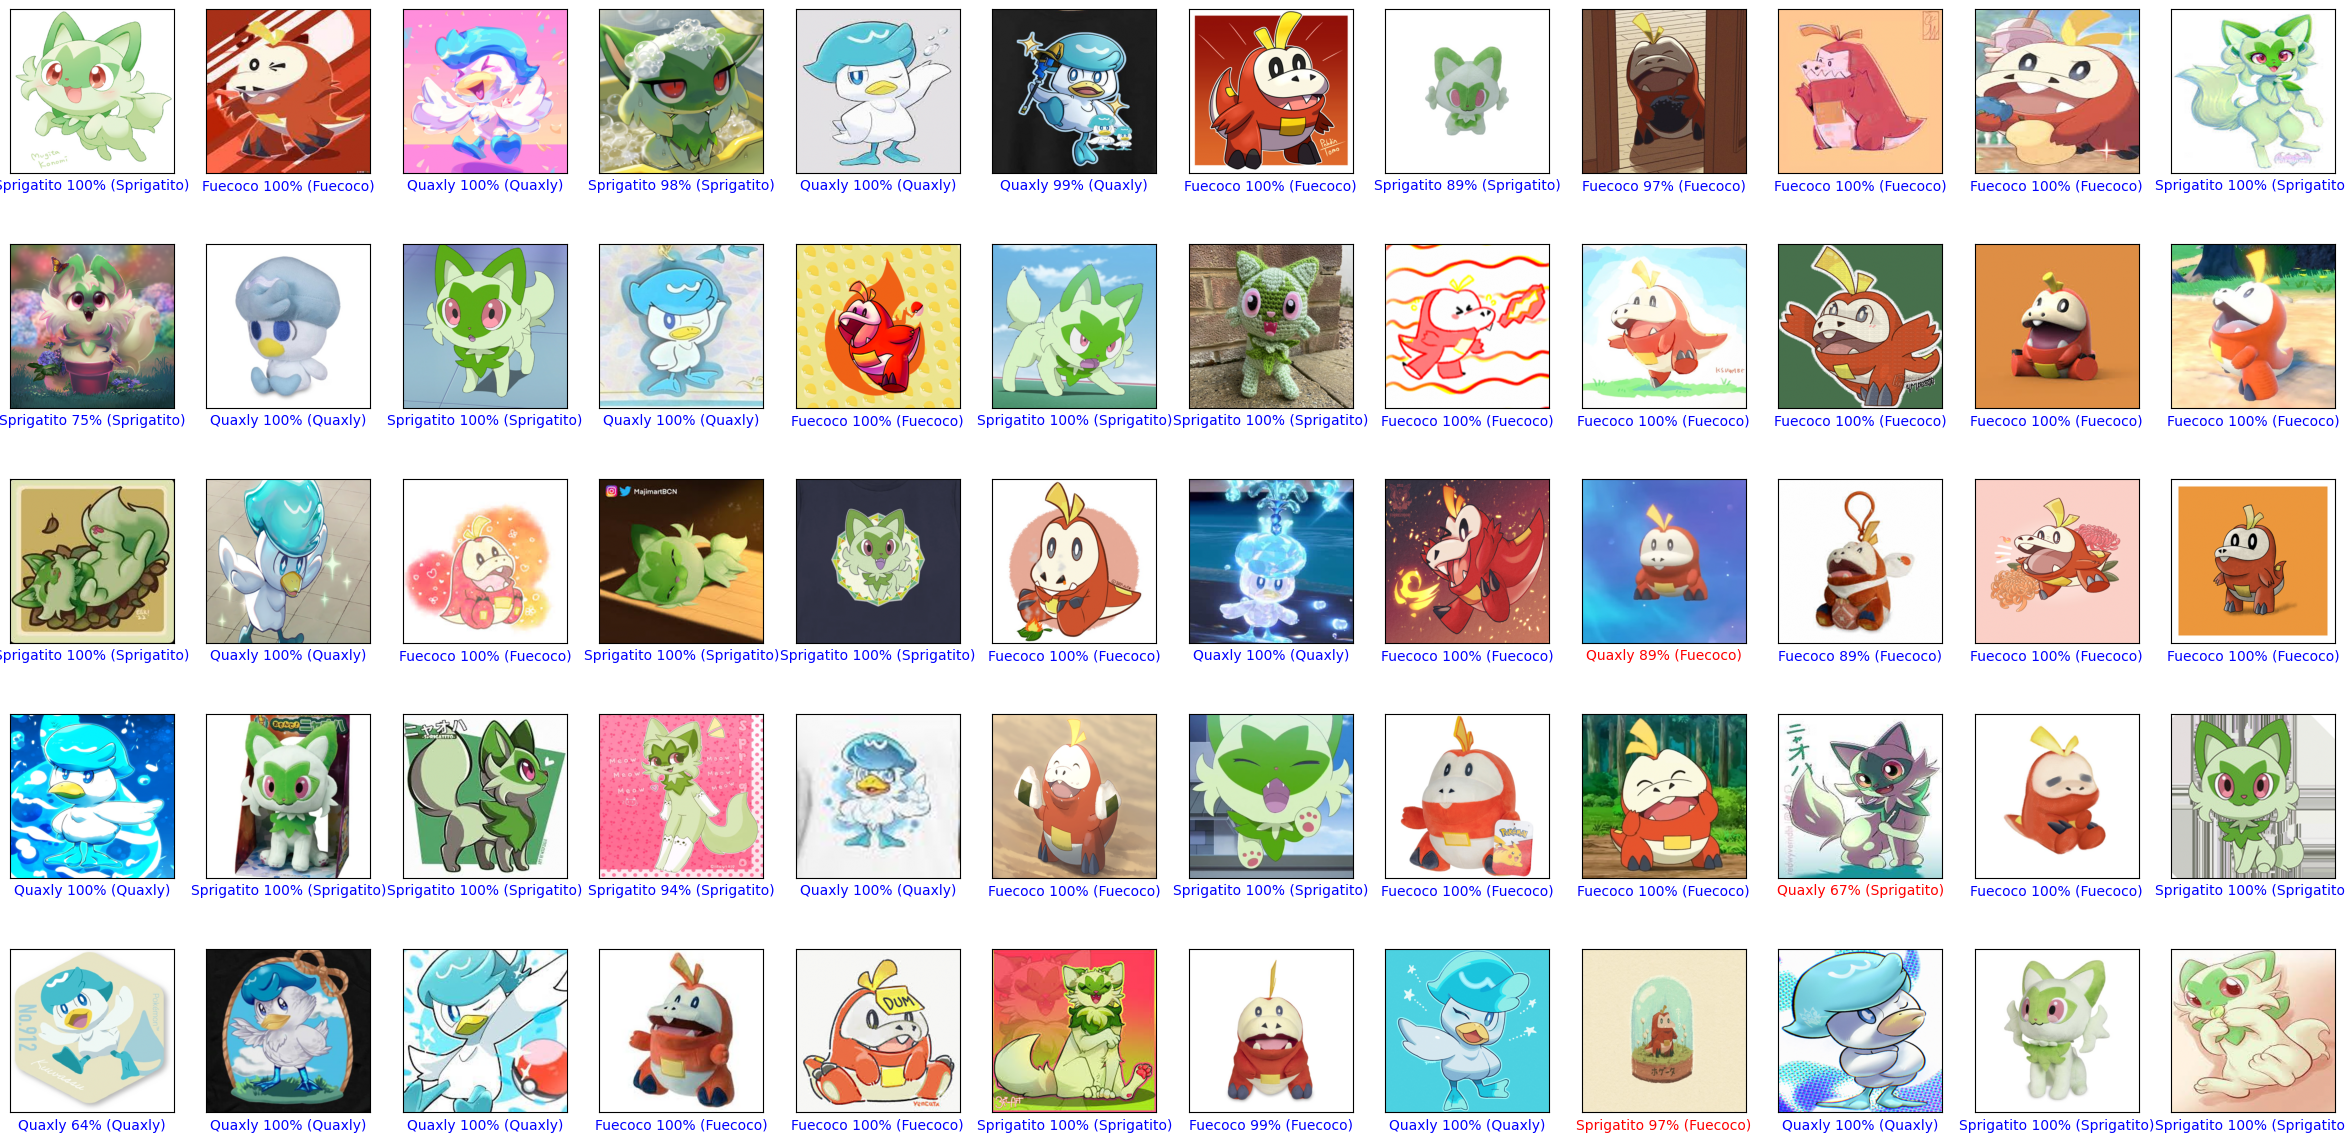

In [149]:
show_actual_and_pred(y_test, predictions, num=len(y_test))

**Step 6: Use GoogleNet and add a LinearLayer on top of it.**

In [150]:
# custom_googLeNet = keras.Sequential([
#   keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=X_train[0].shape),
#   keras.layers.Flatten(),
#   keras.layers.Dense(1024, activation='relu'),
#   keras.layers.Dense(3)
# ])

In [151]:
# custom_googLeNet.compile(
#     optimizer='adam',
#     loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=['accuracy']
# )

In [152]:
# custom_googLeNet.summary()

**Step 7: Train the GoogleNet model and compare the accuracy with the first model.**

In [153]:
# history_2 = custom_googLeNet.fit(
#   X_train, y_train,
#   epochs=epochs,
#   validation_data=(X_val, y_val),
# )

In [154]:
# train_val_acc_loss(history_2, epochs)

In [155]:
# test_loss, test_acc = custom_googLeNet.evaluate(X_test, y_test, verbose=2)

# print('\nTest accuracy:', test_acc)

In [156]:
# probability_model_2 = keras.Sequential([custom_googLeNet, keras.layers.Softmax()])
# predictions_2 = probability_model_2.predict(X_test)

In [157]:
# show_actual_and_pred(y_test, predictions_2)

In [158]:
# y_pred = custom_googLeNet.predict(X_test)
# y_pred = [ np.argmax(p) for p in y_pred ]
# print(np.unique(y_pred))
# comparison = pd.DataFrame({'Actual': y_test, 'Label': y_pred})

# print(comparison)

**Conclusion**

The simple model actually works better than GoogLeNet. From the result, the simple model gets an above 90% accuracy while GoogLeNet at best only get 83% accuracy.